**Problem Statement :** The purpose of this project is to classify colors, there are 10 different images with 20 images for each colors in the train set and 5 images for each colors in the test set

In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from  torchvision.datasets import ImageFolder

Loading  the datasets 

In [2]:
compose = transforms.Compose([transforms.Resize((32, 32)), transforms.ToTensor() ])
train = ImageFolder(root=r'C:\Users\jeremiah\Desktop\colors\train', transform = compose)
test = ImageFolder(root=r'C:\Users\jeremiah\Desktop\colors\test', transform = compose)

In [3]:
train_loader = DataLoader(train ,shuffle = True, batch_size = 50) 
test_loader = DataLoader(test ,shuffle = True, batch_size = 50) 

In [4]:
img_data, label = next(iter(train_loader))

In [5]:

literal_label = os.listdir(r'C:\Users\jeremiah\Desktop\colors\train')

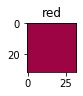

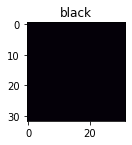

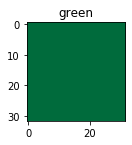

In [6]:
plt.figure(figsize=(3,3))
for i in range(3): 
    plt.subplot(1,3,i+1)
    plt.imshow(img_data[i].permute(1,2,0))
    plt.title(literal_label[label[i]])
    plt.show()

Setting the hyper parameters

In [14]:
epoch = 100
learning_rate = 0.001

In [15]:

class ImageClassificationModel(nn.Module):
    def __init__(self):
        super(ImageClassificationModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*4*4, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)
        
    def forward(self, xb):
        #input: 3 x 32 x 32
        out = self.conv1(xb)
        out = F.relu(out)
        out = self.pool(out)
        #output: 16 x 16 x 16
        out = self.pool(F.relu(self.conv2(out)))
#       #output: 32 x 8 x 8
        out = self.pool(F.relu(self.conv3(out)))
        #output: 64 x 4 x 4
        out = out.view(-1, 64*4*4)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out
    

In [20]:
model = ImageClassificationModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
errors = []

In [21]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [22]:
for i in range(epoch): 
    for idx, (img, label) in enumerate(train_loader):
        output = model(img)
        #Checking the loss of the model.
        loss = criterion(output, label)
        #setting the gradients to zero 
        optimizer.zero_grad()
        #backward propagation to recalculate the gradients.
        loss.backward()
        #updating the weights of the model.
        optimizer.step()
        #accuracy of the model 
        acc = accuracy(output, label)
        errors.append(loss)
        
        print(f'Epoch : {i} / Batch {idx} : Loss : {loss} and Accuracy {acc*100}%')

Epoch : 0 / Batch 0 : Loss : 2.306922435760498 and Accuracy 8.0%
Epoch : 0 / Batch 1 : Loss : 2.297960042953491 and Accuracy 6.0%
Epoch : 0 / Batch 2 : Loss : 2.312845468521118 and Accuracy 2.0%
Epoch : 0 / Batch 3 : Loss : 2.259375810623169 and Accuracy 16.0%
Epoch : 1 / Batch 0 : Loss : 2.2691054344177246 and Accuracy 12.0%
Epoch : 1 / Batch 1 : Loss : 2.219604015350342 and Accuracy 18.0%
Epoch : 1 / Batch 2 : Loss : 2.073908567428589 and Accuracy 34.0%
Epoch : 1 / Batch 3 : Loss : 2.052565097808838 and Accuracy 24.0%
Epoch : 2 / Batch 0 : Loss : 2.122995138168335 and Accuracy 18.0%
Epoch : 2 / Batch 1 : Loss : 1.872749924659729 and Accuracy 28.0%
Epoch : 2 / Batch 2 : Loss : 1.7590281963348389 and Accuracy 24.0%
Epoch : 2 / Batch 3 : Loss : 1.8154189586639404 and Accuracy 40.0%
Epoch : 3 / Batch 0 : Loss : 1.6570022106170654 and Accuracy 38.0%
Epoch : 3 / Batch 1 : Loss : 1.4681822061538696 and Accuracy 42.0%
Epoch : 3 / Batch 2 : Loss : 1.566595435142517 and Accuracy 36.0%
Epoch : 

Epoch : 30 / Batch 1 : Loss : 0.1335277259349823 and Accuracy 92.0%
Epoch : 30 / Batch 2 : Loss : 0.07116787135601044 and Accuracy 96.0%
Epoch : 30 / Batch 3 : Loss : 0.10913529992103577 and Accuracy 94.0%
Epoch : 31 / Batch 0 : Loss : 0.0537610799074173 and Accuracy 100.0%
Epoch : 31 / Batch 1 : Loss : 0.2663397490978241 and Accuracy 86.0%
Epoch : 31 / Batch 2 : Loss : 0.27174654603004456 and Accuracy 88.0%
Epoch : 31 / Batch 3 : Loss : 0.07667384296655655 and Accuracy 98.0%
Epoch : 32 / Batch 0 : Loss : 0.2522253394126892 and Accuracy 92.0%
Epoch : 32 / Batch 1 : Loss : 0.0746789202094078 and Accuracy 100.0%
Epoch : 32 / Batch 2 : Loss : 0.054741859436035156 and Accuracy 100.0%
Epoch : 32 / Batch 3 : Loss : 0.17266084253787994 and Accuracy 94.0%
Epoch : 33 / Batch 0 : Loss : 0.11696921288967133 and Accuracy 94.0%
Epoch : 33 / Batch 1 : Loss : 0.2011350840330124 and Accuracy 94.0%
Epoch : 33 / Batch 2 : Loss : 0.10858318954706192 and Accuracy 96.0%
Epoch : 33 / Batch 3 : Loss : 0.0356

Epoch : 60 / Batch 0 : Loss : 0.0701017826795578 and Accuracy 98.0%
Epoch : 60 / Batch 1 : Loss : 0.08823530375957489 and Accuracy 94.0%
Epoch : 60 / Batch 2 : Loss : 0.07574525475502014 and Accuracy 98.0%
Epoch : 60 / Batch 3 : Loss : 0.023758621886372566 and Accuracy 100.0%
Epoch : 61 / Batch 0 : Loss : 0.019988704472780228 and Accuracy 100.0%
Epoch : 61 / Batch 1 : Loss : 0.09724585711956024 and Accuracy 96.0%
Epoch : 61 / Batch 2 : Loss : 0.045560069382190704 and Accuracy 96.0%
Epoch : 61 / Batch 3 : Loss : 0.030297856777906418 and Accuracy 100.0%
Epoch : 62 / Batch 0 : Loss : 0.03325113281607628 and Accuracy 100.0%
Epoch : 62 / Batch 1 : Loss : 0.07806474715471268 and Accuracy 96.0%
Epoch : 62 / Batch 2 : Loss : 0.04040052369236946 and Accuracy 98.0%
Epoch : 62 / Batch 3 : Loss : 0.023660019040107727 and Accuracy 100.0%
Epoch : 63 / Batch 0 : Loss : 0.03705710917711258 and Accuracy 98.0%
Epoch : 63 / Batch 1 : Loss : 0.02330850623548031 and Accuracy 98.0%
Epoch : 63 / Batch 2 : Lo

Epoch : 89 / Batch 2 : Loss : 0.0334029495716095 and Accuracy 100.0%
Epoch : 89 / Batch 3 : Loss : 0.031197596341371536 and Accuracy 100.0%
Epoch : 90 / Batch 0 : Loss : 0.010385798290371895 and Accuracy 100.0%
Epoch : 90 / Batch 1 : Loss : 0.014985425397753716 and Accuracy 100.0%
Epoch : 90 / Batch 2 : Loss : 0.10084781050682068 and Accuracy 94.0%
Epoch : 90 / Batch 3 : Loss : 0.029816539958119392 and Accuracy 98.0%
Epoch : 91 / Batch 0 : Loss : 0.04096484184265137 and Accuracy 98.0%
Epoch : 91 / Batch 1 : Loss : 0.044017259031534195 and Accuracy 98.0%
Epoch : 91 / Batch 2 : Loss : 0.008209840394556522 and Accuracy 100.0%
Epoch : 91 / Batch 3 : Loss : 0.007058426272124052 and Accuracy 100.0%
Epoch : 92 / Batch 0 : Loss : 0.04461418464779854 and Accuracy 98.0%
Epoch : 92 / Batch 1 : Loss : 0.002366795437410474 and Accuracy 100.0%
Epoch : 92 / Batch 2 : Loss : 0.10618069022893906 and Accuracy 94.0%
Epoch : 92 / Batch 3 : Loss : 0.017850005999207497 and Accuracy 98.0%
Epoch : 93 / Batch 

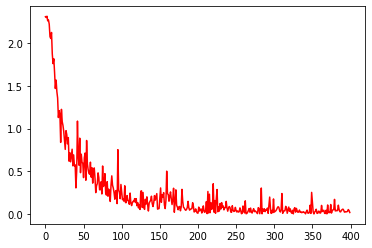

In [27]:
#There are 4 batches and 100 epochs 
total_batches = [ i for i in range(400)]

plt.plot(total_batches, errors, color='red')
plt.show()

Testing the models 

In [104]:
total = 0
indie_acc = dict(zip(literal_label, [0 for i in range(10)]))
sample = 0
with torch.no_grad():
    counter = 0
    for x,y in test_loader:
        outputs = model(x)
        counter = counter + 1
        _, preds = torch.max(outputs, dim=1)
        new_total = torch.sum(torch.eq(preds, y)).item()
        #Checking for the accuracy for each color.
        for pred, label in zip(preds, y):
            if (pred == label): 
                real_label = literal_label[pred]
                indie_acc[real_label] = indie_acc[real_label] + 1 
                counter = counter + 1
#               print(counter)
            
        print(f'Counter =>  {counter}')
        total = total + new_total
        sample = sample + len(y)
        acc = (total / sample)  * 100
        print(f'The test accuracy of the model is {acc}%')

Counter =>  49
The test accuracy of the model is 96.0%


In [105]:
indie_acc

{'black': 5,
 'blue': 5,
 'brown': 4,
 'green': 5,
 'grey': 5,
 'orange': 5,
 'red': 5,
 'violet': 5,
 'white': 5,
 'yellow': 4}

From the above Only brown and yellow was incorrectly classified as once

And the accuracy of the model is 96.0%